In [2]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt

# Mathematical simulation of the optic pathway axon guidance

## Introduction

### How do neurons in the developing brain know where to go? 

One complex problem in neuroscience is how the nervous system is formed. In the brain neurons form complex structures that have very specific connections. Neurons have cell bodies that do signal processing, dendrites which accept input and axons that extend to form connections to other neurons in specific areas. The question is: How axons know in which direction to grow and where to go to connect to the correct downstream neurons? They interact with chemical signals released from other cells around them. These signals attract or repel axons, creating a kind of “chemical map” that shapes the final wiring of the nervous system.

### Optic pathway as a model for axon guidance

One biological model used to explore this question is the optic pathway. During embryonic development the tissue that becomes your brain is folded in such a way that some of it ends up in your eyes – that is the neural retina. The neurons that form this tissue are called retinal ganglion cells (RGC). They end up separated from the rest of your brain and need to send their axons back to the brain so that you can see. The path they take is complex with multiple changes in direction (but only one type of neuron) which makes it perfect for exploring axon guidance. 

RGC axons grow through multiple decision points (Fig. 1). They (1) grow to the optic fibre layer at the inner surface of the retina, (2) extend to the optic disc, (3) exit the eye, (4) grow to the optic chiasm where, in species with binocular vision, they chose to either project contralaterally crossing the ventral midline of the brain or project ipsilaterally, and finally, (5) reach the primary visual centres of the brain (Herrera, Erskine and Morenilla-Palao, 2019).

|![Optic pathway](Images/Optic-pathway.png)|
|---|
|__Figure 1. Optic pathway (mouse).__ Retinal ganglion cell(RGC) axons travel from the retina, through the optic disc, via the optic nerve, to the optic chiasm. There, they continue either contra or ipsilaterally to the optic tract and the higher visual centers. Adapted from Erskine and Herrera (2014).|

### Project focus

In this project, we focus on the early stages of the RGCs journey — specifically, how RGC axons grow from their starting positions in the retina through the optic fiber layer (1) to the optic disc (2), the exit point from the eye. If we zoom at the back of the eye we can see where all the cells of interest are located (Fig 2). The axons need to grow "up" towards the inside of the eye, where they join the axons of other RGCs and form the __*optic fiber layer*__ and then turn towards the center where the __*optic disc*__ is located. 

|![Retina zoomed](Images/Retina-zoomed.png)|
|---|
|__Figure 2. Retina - cells and layers.__ Adapted from Kwon, Y.H. et al. (2009)| 

In these stages RGCs axons are guided by several factos. For this project we are going to focus only on chemical signals. 

Chemical signals of interest:
1. Repulsive signals:
    * __Slit molecules__ secreted from <font color="red">amacrine cells</font> (bottom)
    * __Laminin__ secreted from <font color="green">Müller glial cells</font> (top)
2. Attractive signals:
    * __Netrin__ secreted from the <font color="yellow">gial cells at the optic disc</font> (center)

To study this, we develop a simplified mathematical model.

### Project goal

The project goal is to use:

1. Vector fields and gradients to represent chemical cues
2. Discrete time steps to simulate axon movement

In order to make the axons follow a trajectory similar to what is seen on Fig. 2. namely:

1. Move up from their starting possitions 
2. Move centrally towards the midline
3. Descend into the otic disc target zone



## Code simulation:

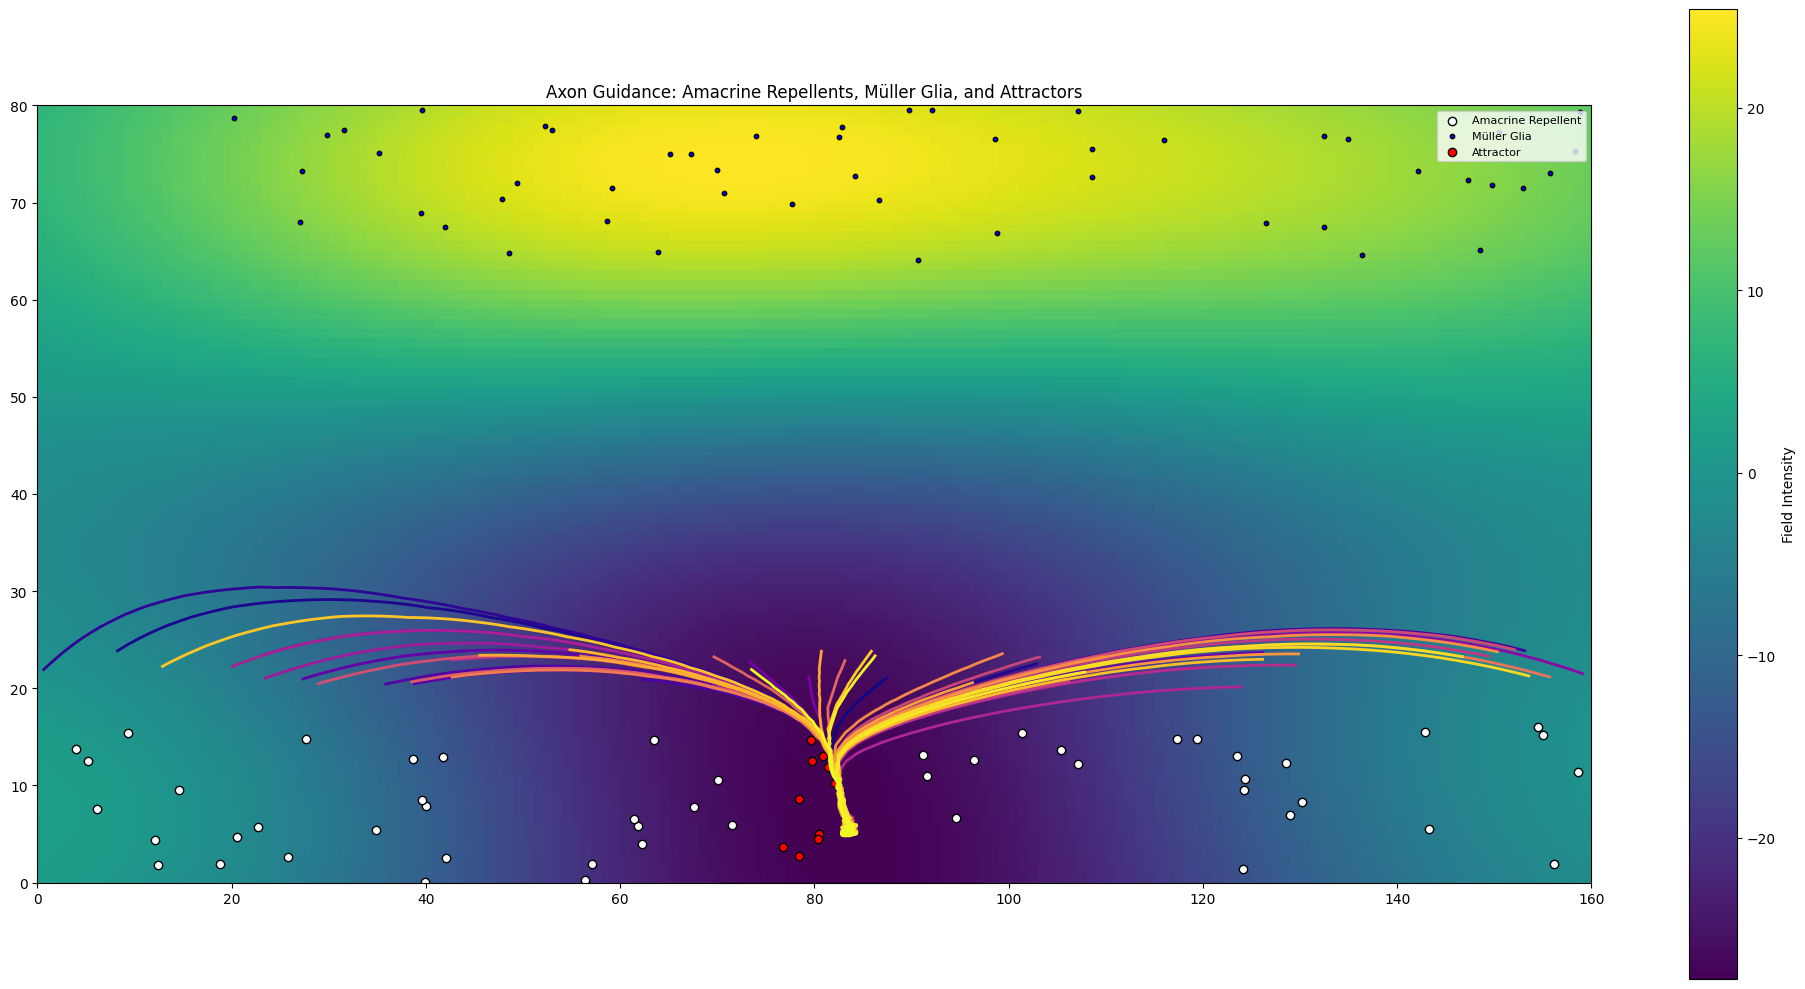

In [3]:
def main(
    grid_width,   # number of x-steps
    grid_height,   # number of y-steps

    num_neurons,
    num_amacrine_repellents,
    num_muller_repellents,
    num_attractors,

    sigma_amacrine,
    sigma_muller,
    sigma_attractor,

    amacrine_strength,
    muller_strength,
    attractor_strength,

    max_steps,
    include_plot=True,

    #This is a quick fix to allow for field expansion it would be better to have all field coordinates here 
    am_left_end=0.45,
    am_right_start=0.55,
    atr_left=0.475, 
    atr_right=0.525
):
    """
    Run the full axon guidance simulation with visual output.

    Generates a spatial guidance field using repellent and attractor cues,
    simulates neuron trajectories through the field, and optionally plots
    the results with color-coded paths and cue locations. 
    
    Use include_plot = False to avoid generating a plot.

    Parameters:
        grid_width (int): Number of discrete steps in the x-direction.
        grid_height (int): Number of discrete steps in the y-direction.
        num_neurons (int): Number of neurons to simulate.
        num_amacrine_repellents (int): Number of amacrine repellent sources.
        num_muller_repellents (int): Number of Müller glia repellent sources.
        num_attractors (int): Number of attractor sources (e.g., optic disc cues).
        sigma_amacrine (float): Spread of amacrine repellent effect.
        sigma_muller (float): Spread of Müller repellent effect.
        sigma_attractor (float): Spread of attractor effect.
        amacrine_strength (float): Intensity of amacrine repulsion.
        muller_strength (float): Intensity of Müller repulsion.
        attractor_strength (float): Intensity of attraction.
        max_steps (int): Maximum number of steps per neuron.
        include_plot (bool): Whether to visualize the simulation.
        am_left_end (float): Right boundary of left amacrine repellent zone.
        am_right_start (float): Left boundary of right amacrine repellent zone.
        atr_left (float): Left bound for placing attractors.
        atr_right (float): Right bound for placing attractors.

    Returns:
        all_trajectories (dict): Dictionary mapping neuron index to trajectory arrays.
    """
    #step_size = 1.0 / max(grid_width, grid_height) - original solution but it distorts widened view simulation
    step_size = 1.0 / 180 # use the original grid_width (higher than the grid_height) to keep the normal field the same and allow for widened field
    # Grid setup
    x = np.linspace(0, 1, grid_width)
    y = np.linspace(0, 1, grid_height)
    x, y = np.meshgrid(x, y)

    # generate field (return total_field)
    total_field, amacrine_positions, repellent_positions_muller, attractor_positions = generate_field(
        num_amacrine_repellents=num_amacrine_repellents,
        num_muller_repellents=num_muller_repellents,
        num_attractors=num_attractors,

        sigma_amacrine=sigma_amacrine,
        sigma_muller=sigma_muller,
        sigma_attractor=sigma_attractor,
        
        amacrine_strength=amacrine_strength,
        muller_strength=muller_strength,
        attractor_strength=attractor_strength,

        x=x,
        y=y,

        am_left_end=am_left_end,
        am_right_start=am_right_start,
        atr_left=atr_left,
        atr_right=atr_right
    )
    
    # compute neuron trajectories and return ND array with them + a list of indexes for color coding
    all_trajectories = compute_neuron_trajectory(
        total_field=total_field,
        grid_width=grid_width,
        grid_height=grid_height,
        num_neurons=num_neurons,
        step_size=step_size,
        max_steps=max_steps
    )
    
    # Generate a plot
    if include_plot:
        # use AXIS where you would use PLT in original code
        fig, axis = plot_field(total_field=total_field, grid_height=grid_height, grid_width=grid_width)
        axis = plot_neurons(all_trajectories=all_trajectories, axis=axis, grid_width=grid_width, grid_height=grid_height, num_neurons=num_neurons)
        axis = plot_atr_rep(
            axis=axis,
            grid_width=grid_width,
            grid_height=grid_height,
            amacrine_positions=amacrine_positions,
            repellent_positions_muller=repellent_positions_muller,
            attractor_positions=attractor_positions
        )
        
        plt.title("Axon Guidance: Amacrine Repellents, Müller Glia, and Attractors")
        plt.legend(loc='upper right', fontsize=8)
        plt.tight_layout()
        plt.show()
    
    return all_trajectories

def generate_field(
    num_amacrine_repellents,
    num_muller_repellents,
    num_attractors,

    sigma_amacrine,
    sigma_muller,
    sigma_attractor,
    
    amacrine_strength,
    muller_strength,
    attractor_strength,

    x,
    y,

    am_left_end,
    am_right_start,
    atr_left,
    atr_right
):
    """
    Generate a 2D scalar field by combining Gaussian repellent and attractor sources.

    Amacrine and Müller cells act as repellents (positive Gaussians), while attractors
    (e.g. optic disc) generate negative Gaussians. Sources are randomly positioned within
    biologically plausible regions.

    Parameters:
        num_amacrine_repellents (int): Number of amacrine repellent sources.
        num_muller_repellents (int): Number of Müller glia repellent sources.
        num_attractors (int): Number of attractor sources.

        sigma_amacrine (float): Spread of amacrine Gaussians.
        sigma_muller (float): Spread of Müller Gaussians.
        sigma_attractor (float): Spread of attractor Gaussians.

        amacrine_strength (float): Amplitude of amacrine repulsion.
        muller_strength (float): Amplitude of Müller repulsion.
        attractor_strength (float): Amplitude of attraction (subtracted).

        x, y (np.ndarray): 2D meshgrid coordinates.

        am_left_end (float): Max x-value for left amacrine placement.
        am_right_start (float): Min x-value for right amacrine placement.
        atr_left (float): Min x-value for attractor placement.
        atr_right (float): Max x-value for attractor placement.

    Returns:
        total_field (np.ndarray): Combined scalar field.
        amacrine_positions (list): Coordinates of amacrine sources.
        repellent_positions_muller (list): Coordinates of Müller sources.
        attractor_positions (list): Coordinates of attractor sources.
    """
    # --- Generate field components separately ---

    # 1. Amacrine repellent field
    amacrine_positions = [
        (np.random.uniform(0.0, am_left_end) if np.random.rand() < 0.5 else np.random.uniform(am_right_start, 1.0), 
        np.random.uniform(0.0, 0.2)) 
        for _ in range(num_amacrine_repellents)
    ]
    amacrine_field = np.zeros_like(x)

    for rx, ry in amacrine_positions:
        amacrine_field += amacrine_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_amacrine**2))

    # 2. Müller glia repellent field
    repellent_positions_muller = [
        (np.random.uniform(0, 1), np.random.uniform(0.8, 1)) for _ in range(num_muller_repellents)
    ]
    muller_field = np.zeros_like(x)
    for rx, ry in repellent_positions_muller:
        muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

    # 3. Attractor field (optic disc)
    attractor_positions = [
        (np.random.uniform(atr_left, atr_right), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
    ]
    attractor_field = np.zeros_like(x)
    for ax, ay in attractor_positions:
        attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

    # --- Combine all fields ---
    total_field = amacrine_field + muller_field + attractor_field

    return total_field, amacrine_positions, repellent_positions_muller, attractor_positions

def compute_neuron_trajectory(
        total_field,
        grid_width,
        grid_height,
        num_neurons,
        step_size,
        max_steps
    ):
    """
    Simulate neuron trajectories guided by the gradient of a scalar field.

    Neurons start at random positions in a specified x and y interval and follow the negative gradient
    (descent) of the input field. If the gradient magnitude is zero,
    a random step is taken to mimic exploratory behavior.

    Parameters:
        total_field (np.ndarray): 2D scalar field representing guidance cues.
        grid_width (int): Width of the field grid.
        grid_height (int): Height of the field grid.
        num_neurons (int): Number of neurons to simulate.
        step_size (float): Distance moved per step.
        max_steps (int): Maximum steps per neuron.

    Returns:
        all_trajectories (dict): Dictionary mapping neuron index to a
        (steps x 2) array of (x, y) trajectory coordinates in normalized [0, 1] space.
    """
    # --- Compute field gradient ---
    grad_y, grad_x = np.gradient(total_field)

    # --- Neuron starting positions ---
    starting_positions = [
        (np.random.uniform(0, 1), np.random.uniform(0.25, 0.3)) for _ in range(num_neurons)
    ]

        # --- Simulate each neuron and save trajectories of---

    all_trajectories = {}
    for idx, start_pos in enumerate(starting_positions):
        fpos = np.array(start_pos, dtype=float)
        trajectory = []

        for _ in range(max_steps):
            trajectory.append(fpos.copy())
            i = int(fpos[1] * (grid_height - 1))
            j = int(fpos[0] * (grid_width - 1))
            if i < 0 or i >= grid_height or j < 0 or j >= grid_width:
                break
            direction = np.array([grad_x[i, j], grad_y[i, j]])
            norm = np.linalg.norm(direction)
            if norm == 0: # If gradient at a point is 0 the neuron should take a random step to mimic real cell behaviour
                random_direction = np.random.randn(2)
                random_direction /= np.linalg.norm(random_direction)
                fpos += step_size * random_direction
            else:
                fpos -= step_size * direction / norm
            
        trajectory = np.array(trajectory)
        all_trajectories[idx] = trajectory

    return all_trajectories

def plot_field(total_field, grid_height, grid_width):
    """
    Plots a 2D scalar field using a color map.

    Displays the field with the origin at the lower-left and axes scaled
    to the specified grid dimensions. A colorbar indicates field intensity.

    Parameters:
        total_field (np.ndarray): 2D array representing the scalar field.
        grid_height (int): Height of the field in display units.
        grid_width (int): Width of the field in display units.

    Returns:
        fig (matplotlib.figure.Figure): The created figure object.
        axis (matplotlib.axes.Axes): The axes containing the plot.
    """
    fig, axis = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    cax = axis.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_width, 0, grid_height])
    fig.colorbar(cax, label='Field Intensity')

    return fig, axis

def plot_neurons(all_trajectories, axis, grid_width, grid_height, num_neurons):
    """
    Plots neuron trajectories on an existing (field) axis.

    Each neuron's path is scaled to pixel coordinates and plotted with a unique color.
    Useful for visualizing movement across a field.

    Parameters:
        all_trajectories (dict): Dictionary of neuron trajectories; each value is
                                 an (N x 2) array of (x, y) coordinates in [0, 1].
        axis (matplotlib.axes.Axes): Axis object to plot on.
        grid_width (int): Width of the field in display units.
        grid_height (int): Height of the field in display units.
        num_neurons (int): Total number of neurons (for color mapping).

    Returns:
        axis (matplotlib.axes.Axes): The modified axis with trajectories plotted.
    """
    colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))
    for idx, trajectory in all_trajectories.items():
        axis.plot(trajectory[:, 0] * grid_width, trajectory[:, 1] * grid_height, color=colors[idx], linewidth=2)
    
    return axis
    
def plot_atr_rep(axis, grid_width, grid_height, amacrine_positions, repellent_positions_muller, attractor_positions):
    """
    Plot attractor and repellent cell positions on a given (field) axis.

    Visualizes amacrine cells, Müller glia repellents, and attractors (optic disc cues) 
    as scatter points in distinct colors.
    Coordinates are scaled from normalized [0, 1] space to grid units.

    Parameters:
        axis (matplotlib.axes.Axes): Axis object to plot on.
        grid_width (int): Width of the field in display units.
        grid_height (int): Height of the field in display units.
        amacrine_positions (list of tuples): (x, y) positions of Amacrine repellents.
        repellent_positions_muller (list of tuples): (x, y) positions of Müller glia repellents.
        attractor_positions (list of tuples): (x, y) positions of attractor cues.

    Returns:
        axis (matplotlib.axes.Axes): The modified axis with scatter plots added.
    """
    for rx, ry in amacrine_positions:
        axis.scatter(rx * grid_width, ry * grid_height, color='white', edgecolor='black', label='Amacrine Repellent' if rx == amacrine_positions[0][0] else "")

    for rx, ry in repellent_positions_muller:
        axis.scatter(rx * grid_width, ry * grid_height, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

    for ax, ay in attractor_positions:
        axis.scatter(ax * grid_width, ay * grid_height, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")
    
    return axis

# this if clause stops the code from being executed when imported in another file
if __name__ == "__main__":

    main(
        grid_width = 160,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 50,
        num_muller_repellents = 50,
        num_attractors = 10,
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 100
    )



## Mathematical Explainer: Axon Guidance as Gradient Descent in a Composite Potential Field

This simulation models the early pathfinding behavior of retinal ganglion cell (RGC) axons as **gradient descent** through a **composite scalar potential field** $F(x, y)$. The field encodes the distribution of **attractive** and **repulsive** chemical cues in the retina, and the axons are modeled as particles following the steepest decrease in this potential.

---

### 1. Field Construction: A Sum of Gaussian Cues

We discretize the 2D retinal surface as a rectangular grid of size $160 \times 80$ 

This shape was chosen to represent a portion of the retina at the back of the eye where the optic disc where the optic nerve begins. For the model to be accurate we need to include RGCs that are close, but also some further away, as the guidance role of netrin attraction decreases with distanse from the optic disc and the role of Müller glia repulsion increases.

The x and y coordinates in the code are normalised in the interval [0,1] to accomodate potential changes in field size.

The scalar potential field $F(x, y)$ is a sum of three subfields: (a) Amacrine Repellents, (b) Müller Glia Repellents, (c) Optic Disc Glial Attractors

Each subfield uses randomly generated points (within specific coordinates) as point sources of attractive/repulsive signal. 

#### Assumptions:

* Each point source has the strongest signal at the center and signal decreases exponentially with distance.

This mimics diffussion of a chemical molecule from the cell. 

#### (a) Amacrine Repellents

Amacrine cells are located above the photoreceptor layer and just below the RGCs cell bodies, on both sides of the optic disc (Fig2). For this model their locations are randomly generated in the interval $x \in [0.0, 0.45][0.55, 1.0]$ and $y \in [0.1, 0.2]$ 
and used as centers for isotropic repulsive Gaussians using the formula:

$$
F_{\text{amacrine}}(x, y) = S_a * \sum_{i=1}^{N_a} A_a \cdot \exp\left( -\frac{(x - x_i)^2 + (y - y_i)^2}{2\sigma_a^2} \right)
$$

where:

* $N_a$: number of amacrine cells
* $A_a$: strength of repulsion 
* $\sigma_a$: spatial spread of influence
* $(x_i, y_i)$: coordinates of amacrine cells
* $S_a$: Strength of influence of amacrine cells

#### (b) Müller Glia Repellents

Located at the top edge of the retina. Modeled in the same way as amacrine repellents as isotropic repulsive Gaussians.

$$
F_{\text{muller}}(x, y) = S_m * \sum_{j=1}^{N_m} A_m \cdot \exp\left( -\frac{(x - x_j)^2 + (y - y_j)^2}{2\sigma_m^2} \right)
$$

where:

* $N_m$: number of Müller glial cells
* $A_m$: strength of repulsion 
* $\sigma_m$: spatial spread of influence
* $(x_i, y_i)$: coordinates of Müller glial cells
* $S_m$: Strength of influence of Müller cells

#### (c) Optic Disc Glial Attractors

These are used to model the Netrin attraction at the optic disc in the center bottom of the model. Attraction is modelled as a __negavive__ repulsion. 

$$
F_{\text{attractor}}(x, y) = -S_{atr} * \sum_{i=1}^{N_{atr}} A_{atr} \cdot \exp\left( -\frac{(x - x_i)^2 + (y - y_i)^2}{2\sigma_{atr}^2} \right)
$$

where:

* $N_{atr}$: number of attractors cells
* $A_{atr}$: strength of attraction 
* $\sigma_{atr}$: spatial spread of influence
* $(x_i, y_i)$: coordinates of attractor cells
* $ S_{atr}$: Strength of influence of attractor cells

Netrin attraction is long range as opposed to the slit and laminin repulssion from amacrine and Müller glial cells which is more local. This is reflected by __different sigma values__. 

#### (d) Total Field

Total field is calculated as a sum of the attractive and repulsive fields. 

$$
F(x, y) = F_{\text{amacrine}}(x, y) + F_{\text{muller}}(x, y) + F_{\text{attractor}}(x, y)
$$

This is actually a __weighted sum__, because each field is multiplied with a strength parameter ($S_a, S_m, S_{atr}$) when we generate it. This is needed because in reality each field is generated by a specific molecule, and the axons have different sensitivity for each. 

---

### 2. Axon navigation

Axon movement is modelled using __gradient descent__ of the __negative gradient__ of the field.

#### Assumptions:
* Repulsive and attractive __cues don't change significantly__ during the time of axon growth (see `np.gradient()` explaination below). 

This is a simplification and is __not always the case in the actual biological system__, so we have to be careful, especially if we want to expand the model to include the next navigation points of the optic pathway. 

#### (a) Gradient Computation (Numerical Approximation)

$$
\nabla F(x, y) = \left( \frac{\partial F}{\partial x}, \frac{\partial F}{\partial y} \right)
$$

On the discrete grid, we use finite differences to approximate the partial derivatives:

$$
\frac{\partial F}{\partial x}(i, j) \approx \frac{F(i, j+1) - F(i, j-1)}{2\Delta x}, \quad 
\frac{\partial F}{\partial y}(i, j) \approx \frac{F(i+1, j) - F(i-1, j)}{2\Delta y}
$$

##### np.gradient()
In code, this is performed using `np.gradient()`. It uses central differences to calculate partial derivatives.

##### Central Differences

For **most** points (not at the edges), NumPy uses **central differences**, which means:

* For the derivative in `x`, at point `(i, j)`:

  $$
  \frac{\partial f}{\partial x} \approx \frac{f(i, j+1) - f(i, j-1)}{2 \cdot \Delta x}
  $$

* For the derivative in `y`, at point `(i, j)`:

  $$
  \frac{\partial f}{\partial y} \approx \frac{f(i+1, j) - f(i-1, j)}{2 \cdot \Delta y}
  $$

So, each derivative uses only **two neighbors**:

* Left and right for `x` (columns before and after)
* Up and down for `y` (rows above and below)

**Not all 8 neighbors** are used — just the **direct neighbors along x and y**.

|uses:|not:|
|---|---|
|<pre>•  ↑  • <br>←  ⊗  → <br>•  ↓  •</pre>|<pre>↖ ↑ ↗ <br>← ⊗ → <br>↙ ↓ ↘</pre>|



#### (b) Axon Movement as Discrete Gradient Descent

Each axon starts from an initial position $\mathbf{x}_0 = (x_0, y_0)$ and moves iteratively according to the **negative normalized gradient**:

Step update rule:

$$
\mathbf{x}_{t+1} = \mathbf{x}_t - \alpha \cdot \frac{\nabla F(\mathbf{x}_t)}{\|\nabla F(\mathbf{x}_t)\|}
$$

Where:
*	$\mathbf{x}_t = (x_t, y_t)$: the current position

*	$\nabla F(\mathbf{x}_t) = \left( \frac{\partial F}{\partial x}, \frac{\partial F}{\partial y} \right)$: the gradient at that position

* $\alpha$: step size (a small constant)
* $\nabla F$: gradient interpolated at the axon's current position
* $\|\nabla F(\mathbf{x}_t)\|$ - vector length
* The gradient is normalized to ensure consistent movement magnitude.

This is equivalent to a **first-order Euler integration** of the differential equation:

$$
\frac{d\mathbf{x}}{dt} = -\nabla F(\mathbf{x})
$$



## Testing:

Okay, lets evaluate our model now.

### 1. Visual evaluation of each cell type:

#### 1.1 What happens when there are __no attractors__?

__Expectation:__ Axons should concentrate towards the center on the y axis. They would grow either to the left or right depending on their starting possition and not towards the center or down towards the simulated optic disc region.

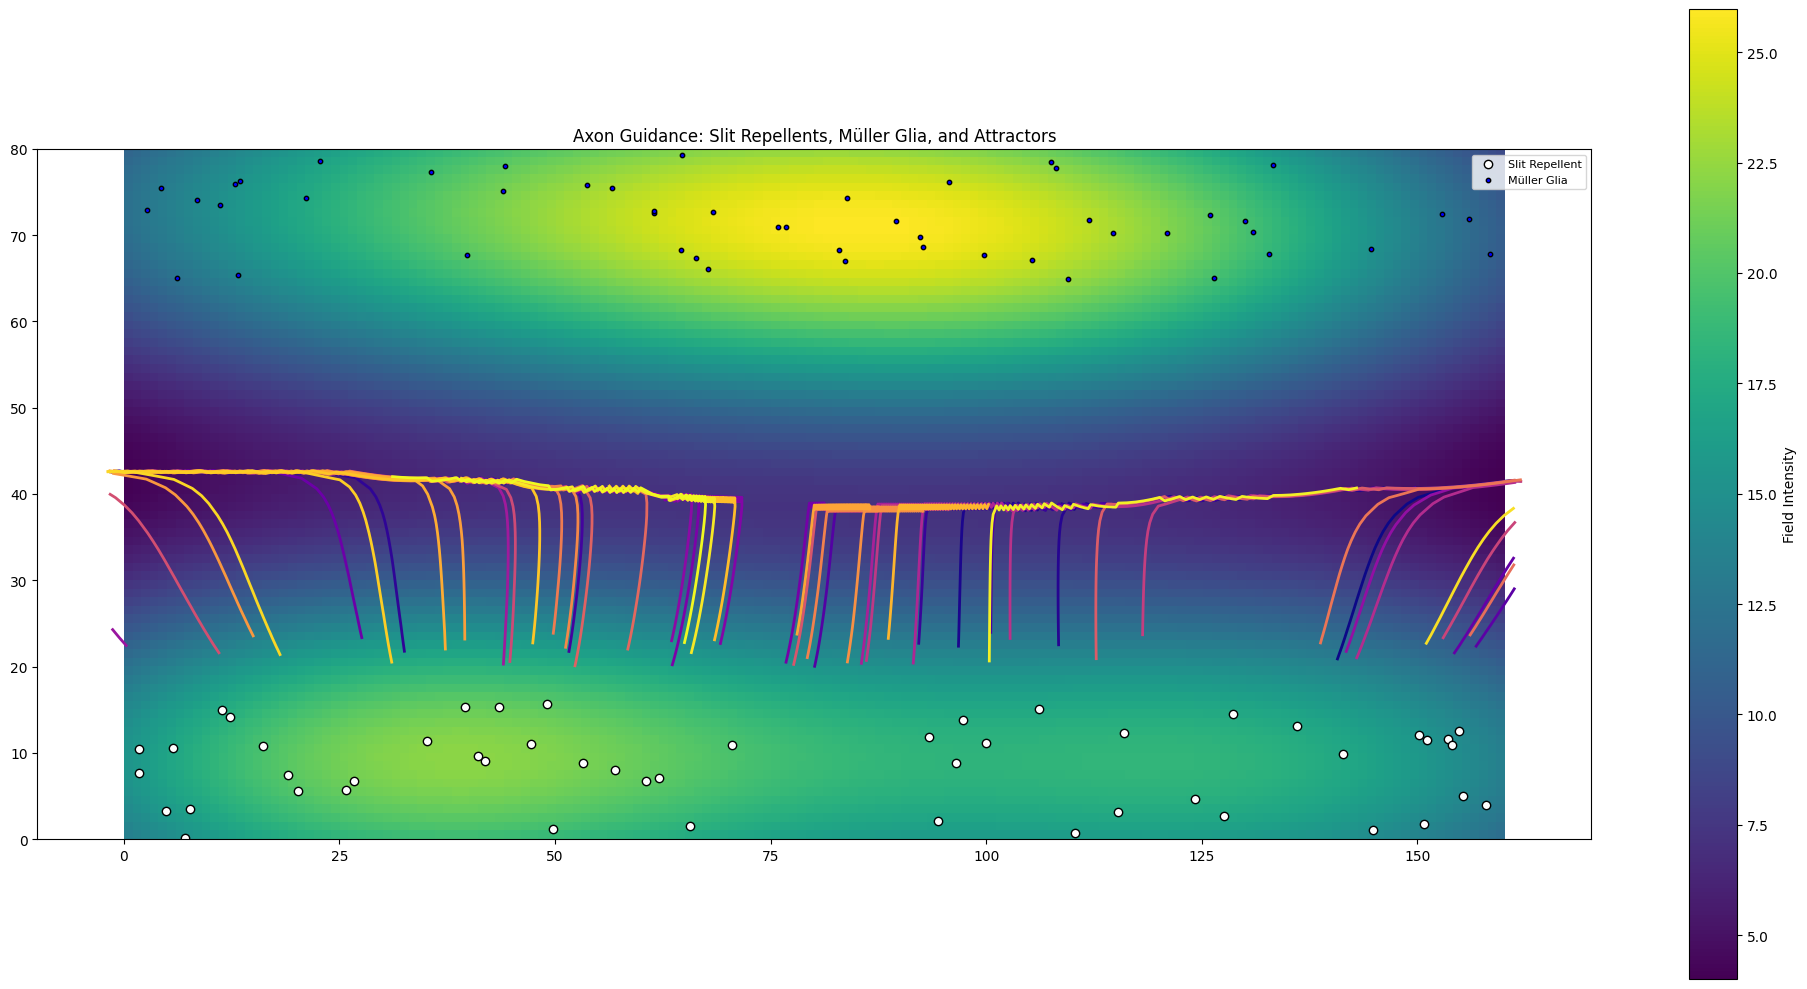

In [4]:
no_attractors = main(
        grid_width = 160,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 50,
        num_muller_repellents = 50,
        num_attractors = 0, # No attractors test
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 100
    )

As expected, axons are growing upward, due to the amacrine repulsive field below, and staying in the optic fiber layer, due to the Müller repulsive field above. 

#### 1.2 What happens if the Amacrine field is missing?

__Expectation:__ Axons should grow straight down and towards the center to the attractors at the simulated optic disc region due to the loss of the repulsive field below.

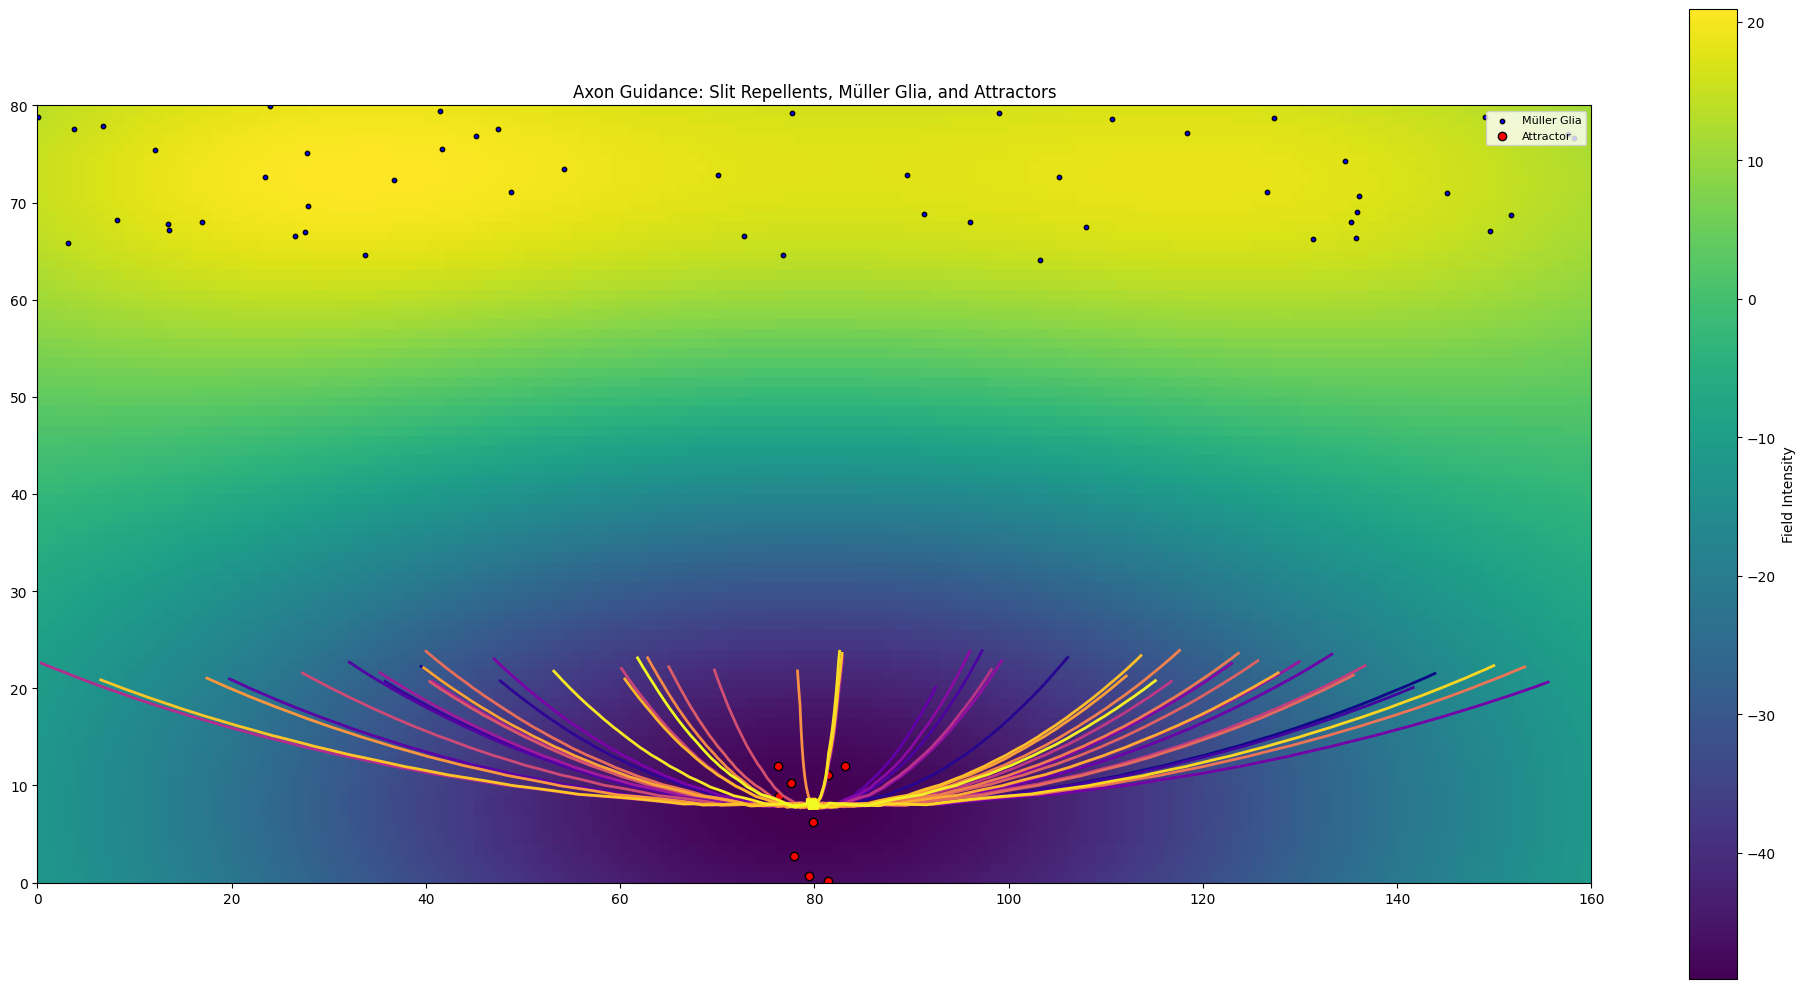

In [5]:
no_amacrine = main(
        grid_width = 160,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 0, # No amacrine field test
        num_muller_repellents = 50,
        num_attractors = 10,
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 100
    )



As expected all axons are growing downward and centrally towards the attractors. 

#### 1.3 What happens if the Müller field is missing?

__Expectation:__ Axons should wander more upwards due to the loss of repulsive field from above.


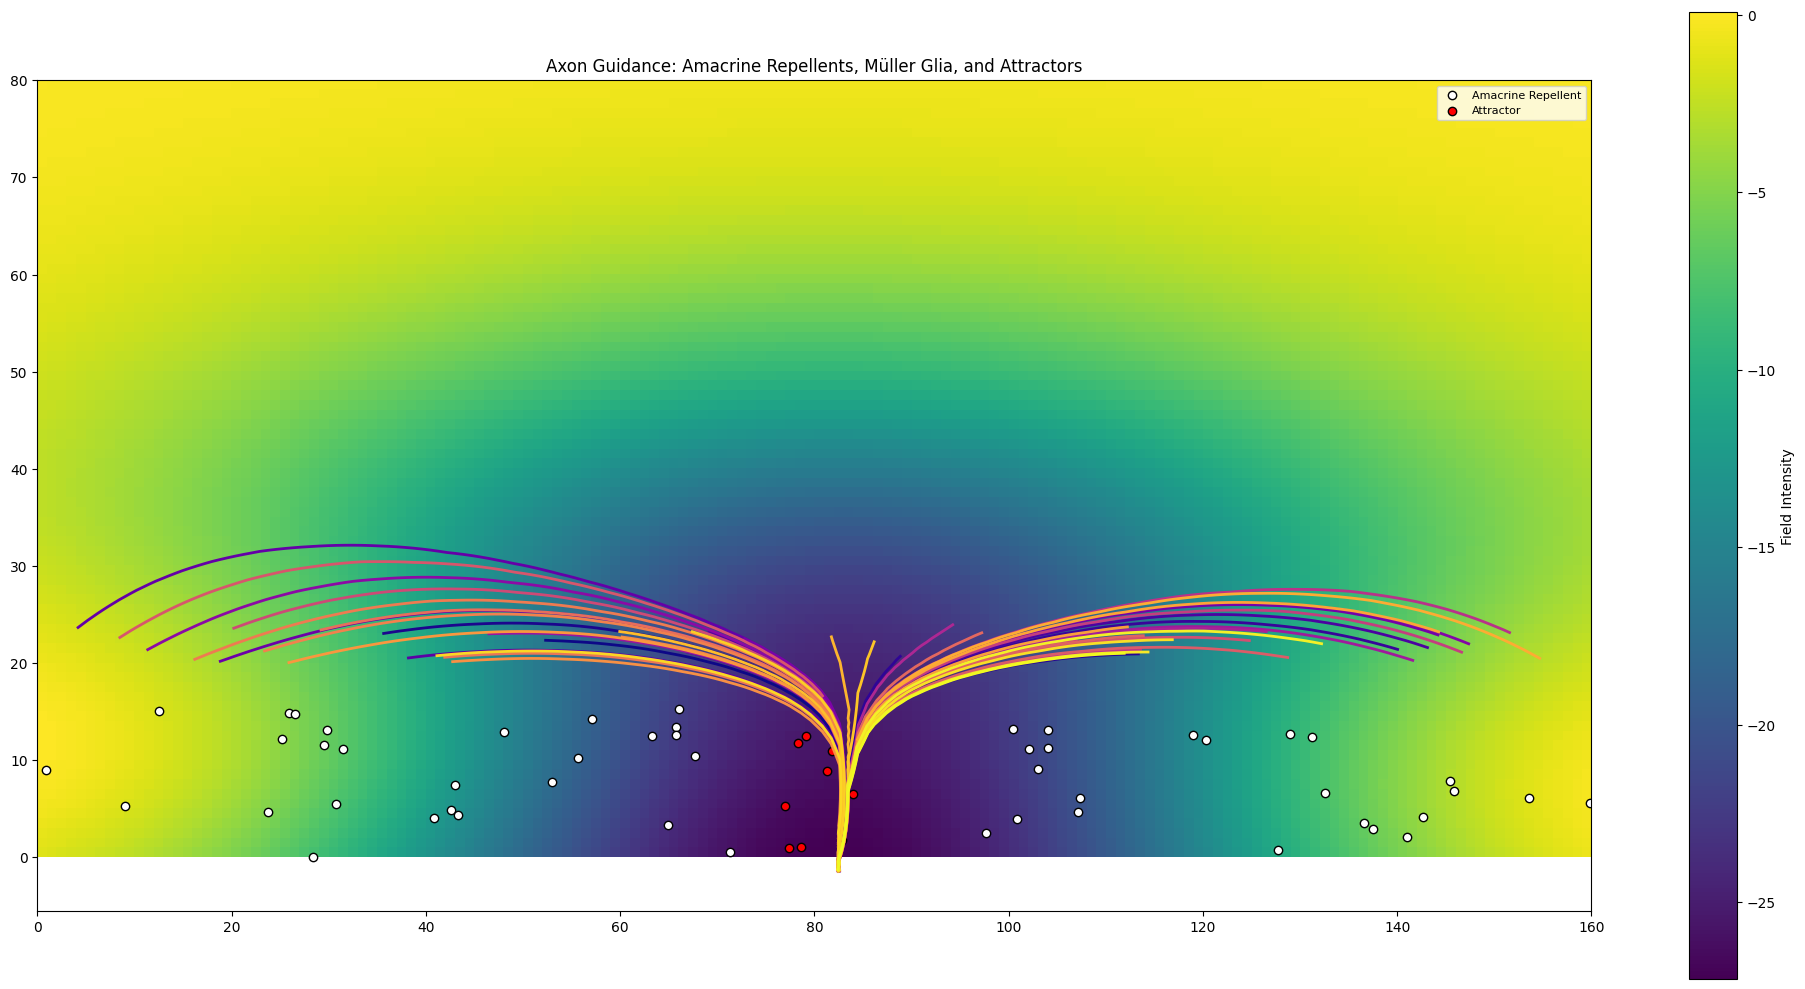

In [4]:
no_attractors = main(
        grid_width = 160,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 50,
        num_muller_repellents = 0, # No muller cells test
        num_attractors = 10, 
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 100
    )

##### __Problem 1:__ Trajectories of axons in the absence of Müller repellent field appear similar to original run. Axons don't appear to be moving more upward. 

This result could be due to several factors: 
1. Changes in trajectories are very subtle.
2. Model is only showing cells which are very close to the optic disc and attractor influence is compensating the lack of repulsive field at the top.

This can be further investigated by:

__Approach 1 - address the possibility of subtle changes within the current field size__

1. Plotting the behaviour with the same neuron, amacrine and attractor coordinates with and without the müller cells. 
2. Running several simulations and generating a statistic of upward drift 

__Limitation:__ unfortinately the code is written to generate random possitions for each cell group each time and there is not enough time to fix it. So we are going to focus on the other possibility.

__Approach 2 - widen field along x axis to investigate longer range effects__

1. Expand field width (x axis)

__Limitation:__ Code is written to generate random possitions for each cell group each time so only a large effect would be noticeable.

To investigate __Problem 1__ further we can try to widen the field and plot the trajectories.

We widen the field 5 fold. We also have to increase the number of amacrine and Müller cells with the same factor to keep the cell density the same.  

Widened field:

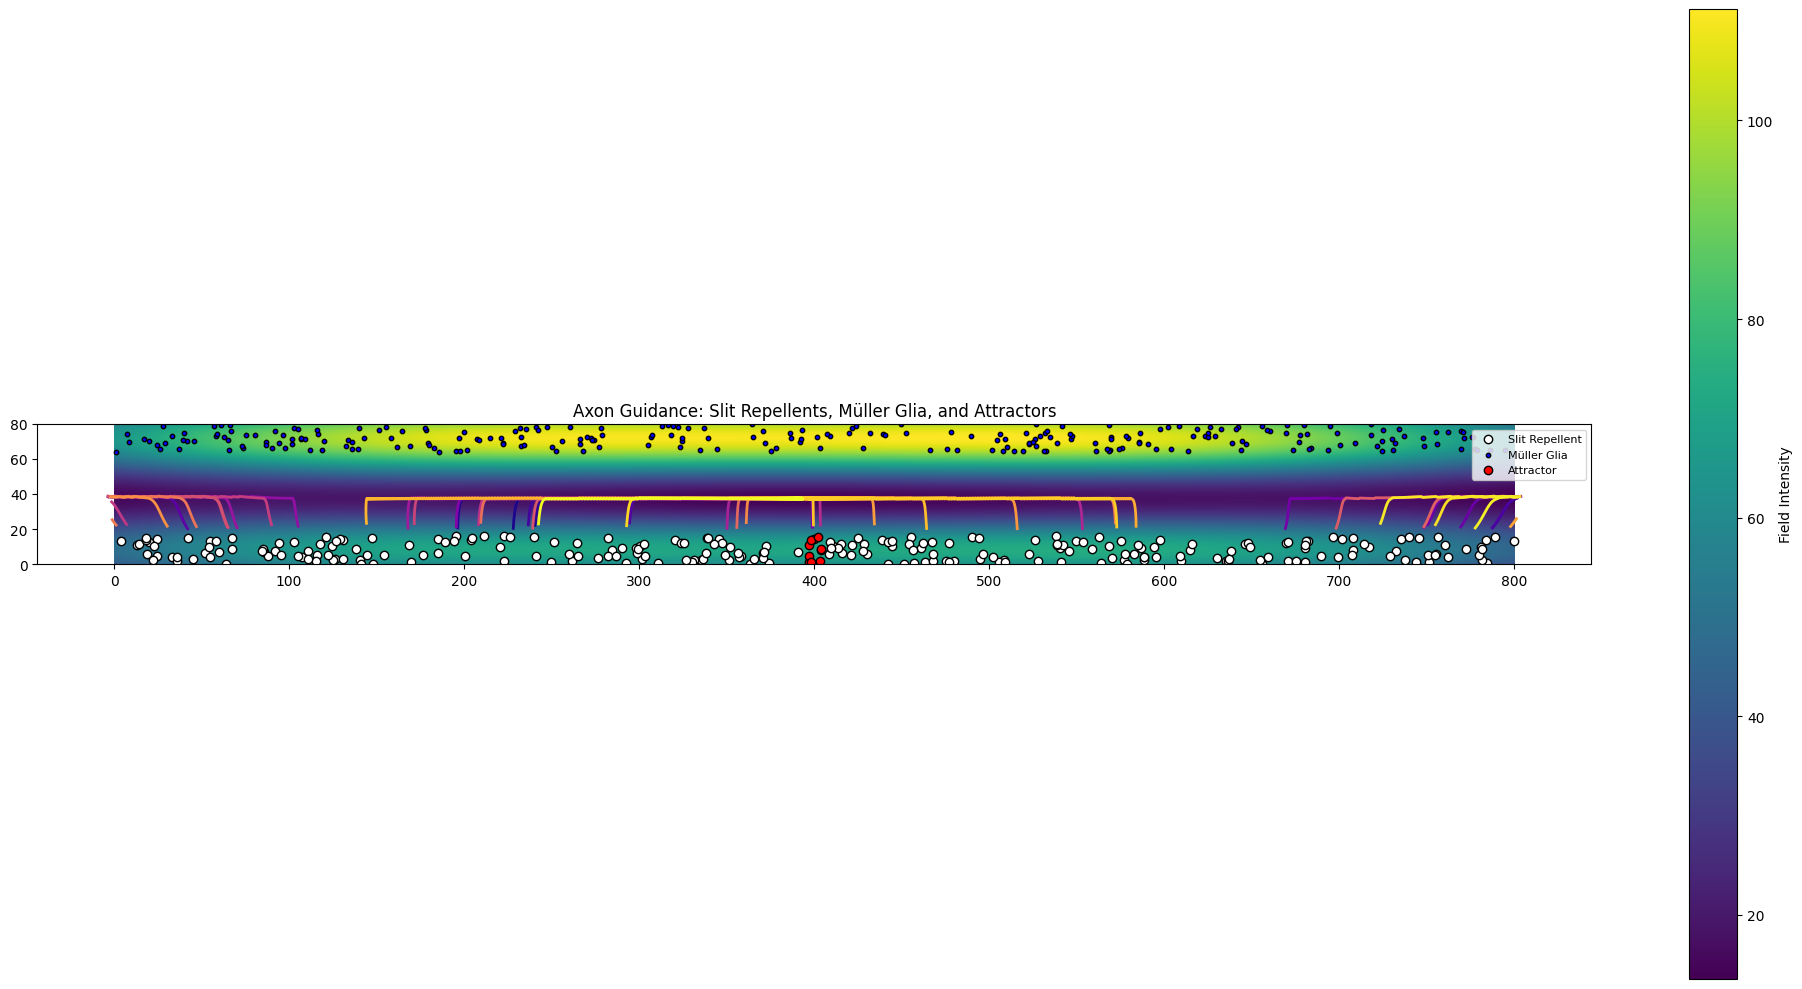

In [66]:
# widen field x 5 fold 
wide_field = main(
        grid_width = 800,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 250, # 50 x 5 - base x 5 to correct for widened field
        num_muller_repellents = 250,
        num_attractors = 10, 
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 500,     # 100 x 5

        # center is 0.5 original interval [-0.5,+0.5] so new interval is [-0.1,+0.1]
        am_left_end = 0.49,     # original - 0.45
        am_right_start = 0.51,  # original - 0.55
          
        # center is 0.5 original interval [-0.25,+0.25] so new interval is [-0.05,+0.05]
        atr_left = 0.495,       
        atr_right = 0.505       
    )
    



Widened field with no Müller cells:

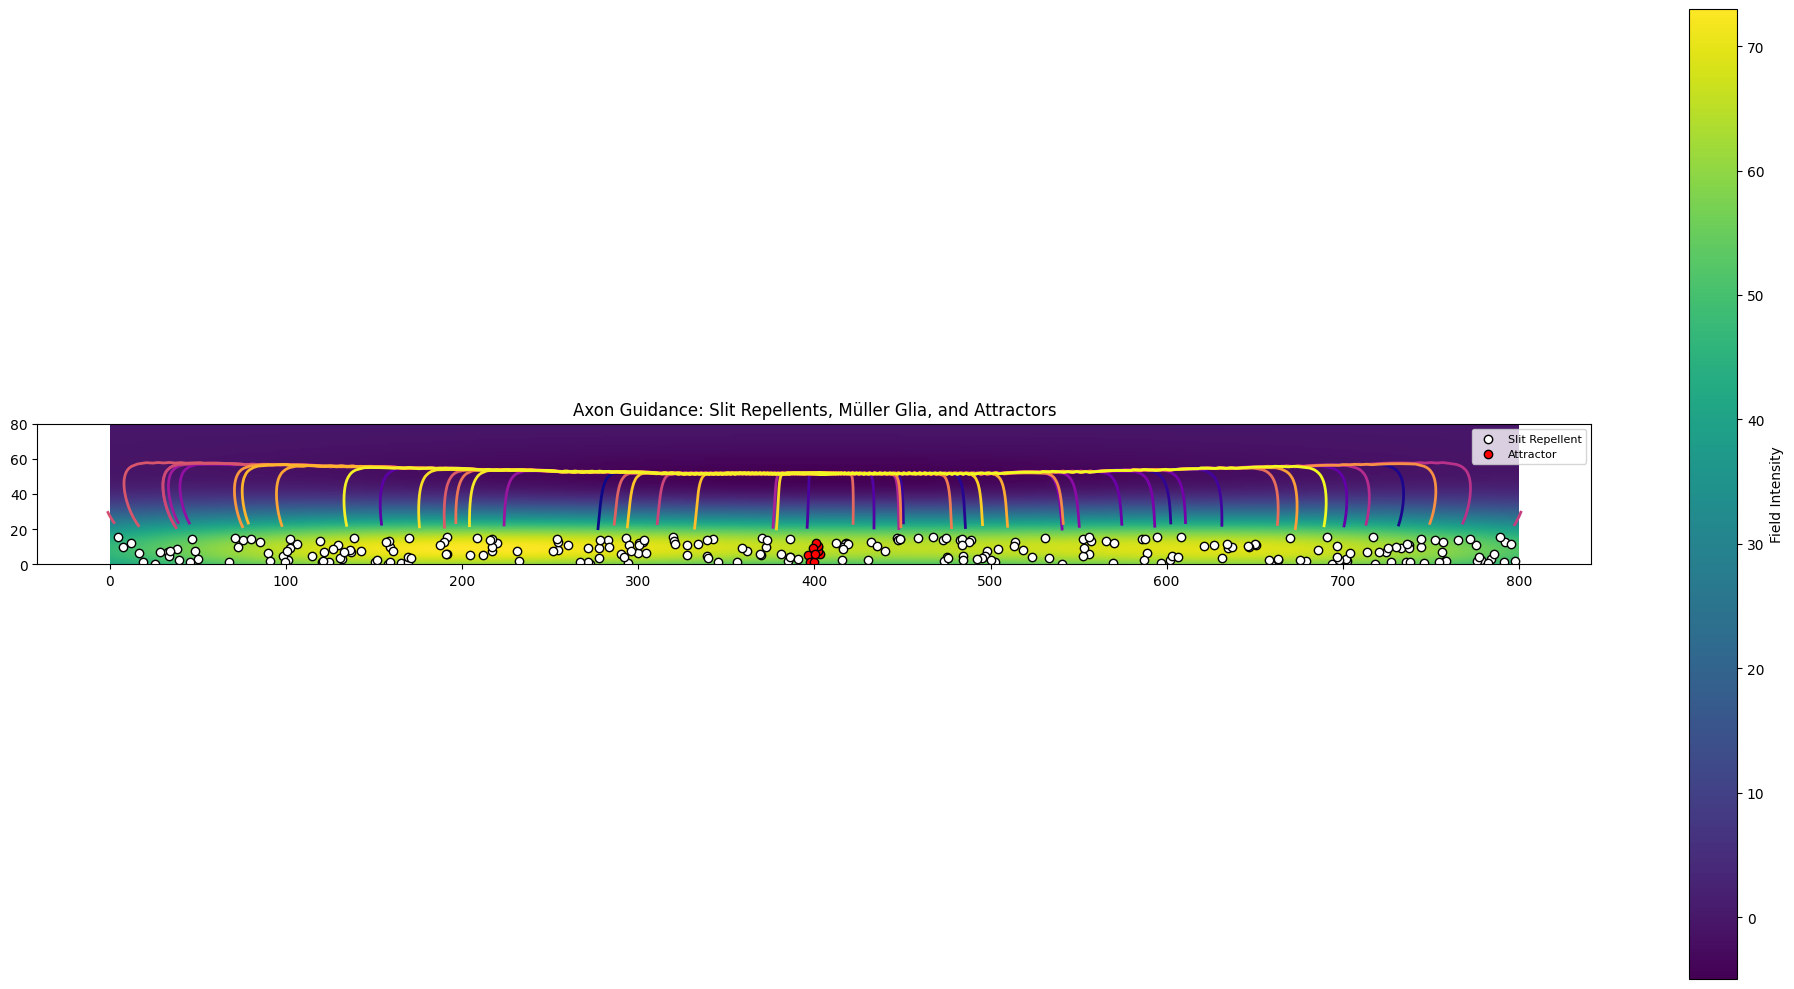

In [67]:
# widen field x 5 fold no mullers
wide_field_no_muller = main(
        grid_width = 800,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 250, # 50 x 5 - base x 5 to correct for widened field
        num_muller_repellents = 0, # no muller cells
        num_attractors = 10, 
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 500, # 100 x 5
        
        # center is 0.5 original interval [-0.5,+0.5] so new interval is [-0.1,+0.1]
        am_left_end = 0.49,     # original - 0.45
        am_right_start = 0.51,  # original - 0.55
          
        # center is 0.5 original interval [-0.25,+0.25] so new interval is [-0.05,+0.05]
        atr_left = 0.495,       
        atr_right = 0.505
    )


##### Problem 1 - conclusion

As we can see Müller cells are indeed limiting the upward growth in this __widened field__. The maximum upward growth is around 40 in the control run, but moves to 55 - 60 in the absence of Müller cells.

To confirm we should run several simulations and compare the max y of the axons trajectories. (I will go back to that if there is enough time)

However, there is another problem.

##### Problem 2 - __In widened field__ the trajectories in the center are also changed and the __axons do not go towards the simulated optic disc region__.

This could potentially be due to spillover effect from the added amacrine cells. 

The sigma values determine how spread the effect of each point source is. If the sigma is too large, the added cells are adding to the repulsive field and the attractors are not strong enough to overcome this effect. 

Lets test this by plotting the normal and widened field with sigmas reduced by one order of magnitude.

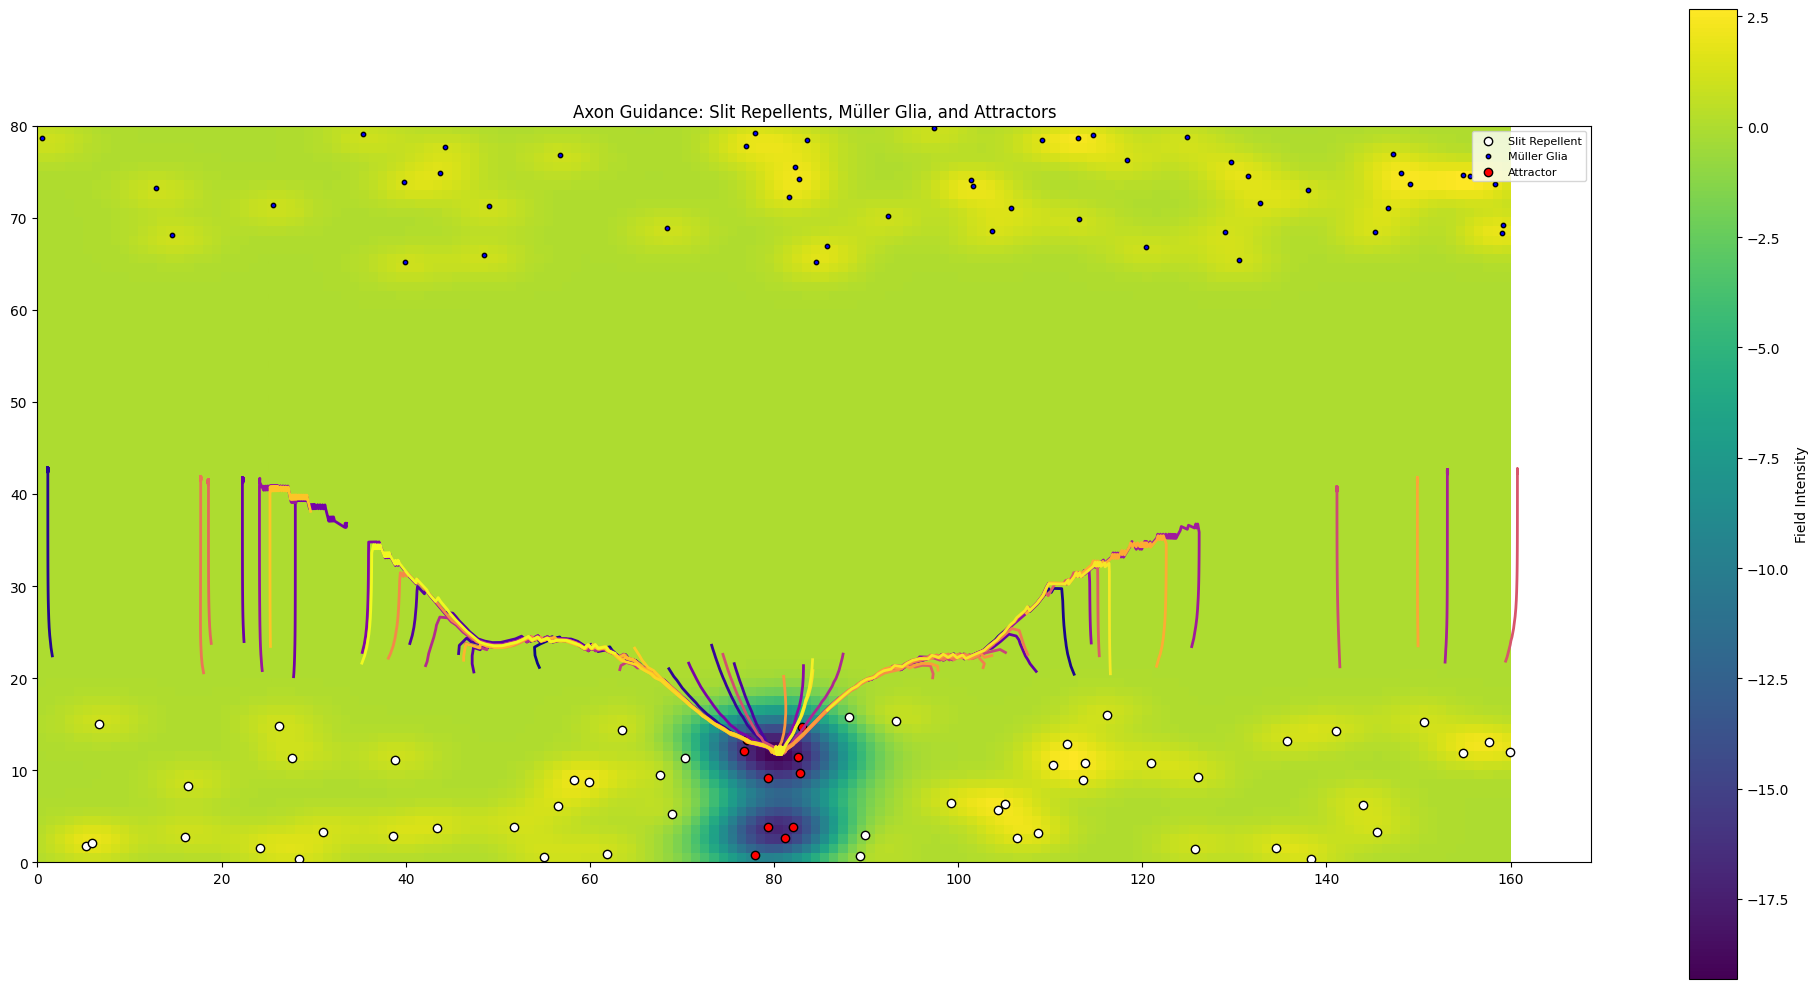

In [68]:
#Sigma reduced by 1 order of magnitude

normal_field = main(
        grid_width = 160,   
        grid_height = 80, 
        num_neurons = 50,
        num_amacrine_repellents = 50,
        num_muller_repellents = 50,
        num_attractors = 10,
        sigma_amacrine = 0.02,
        sigma_muller = 0.02,
        sigma_attractor = 0.03,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 100
    )

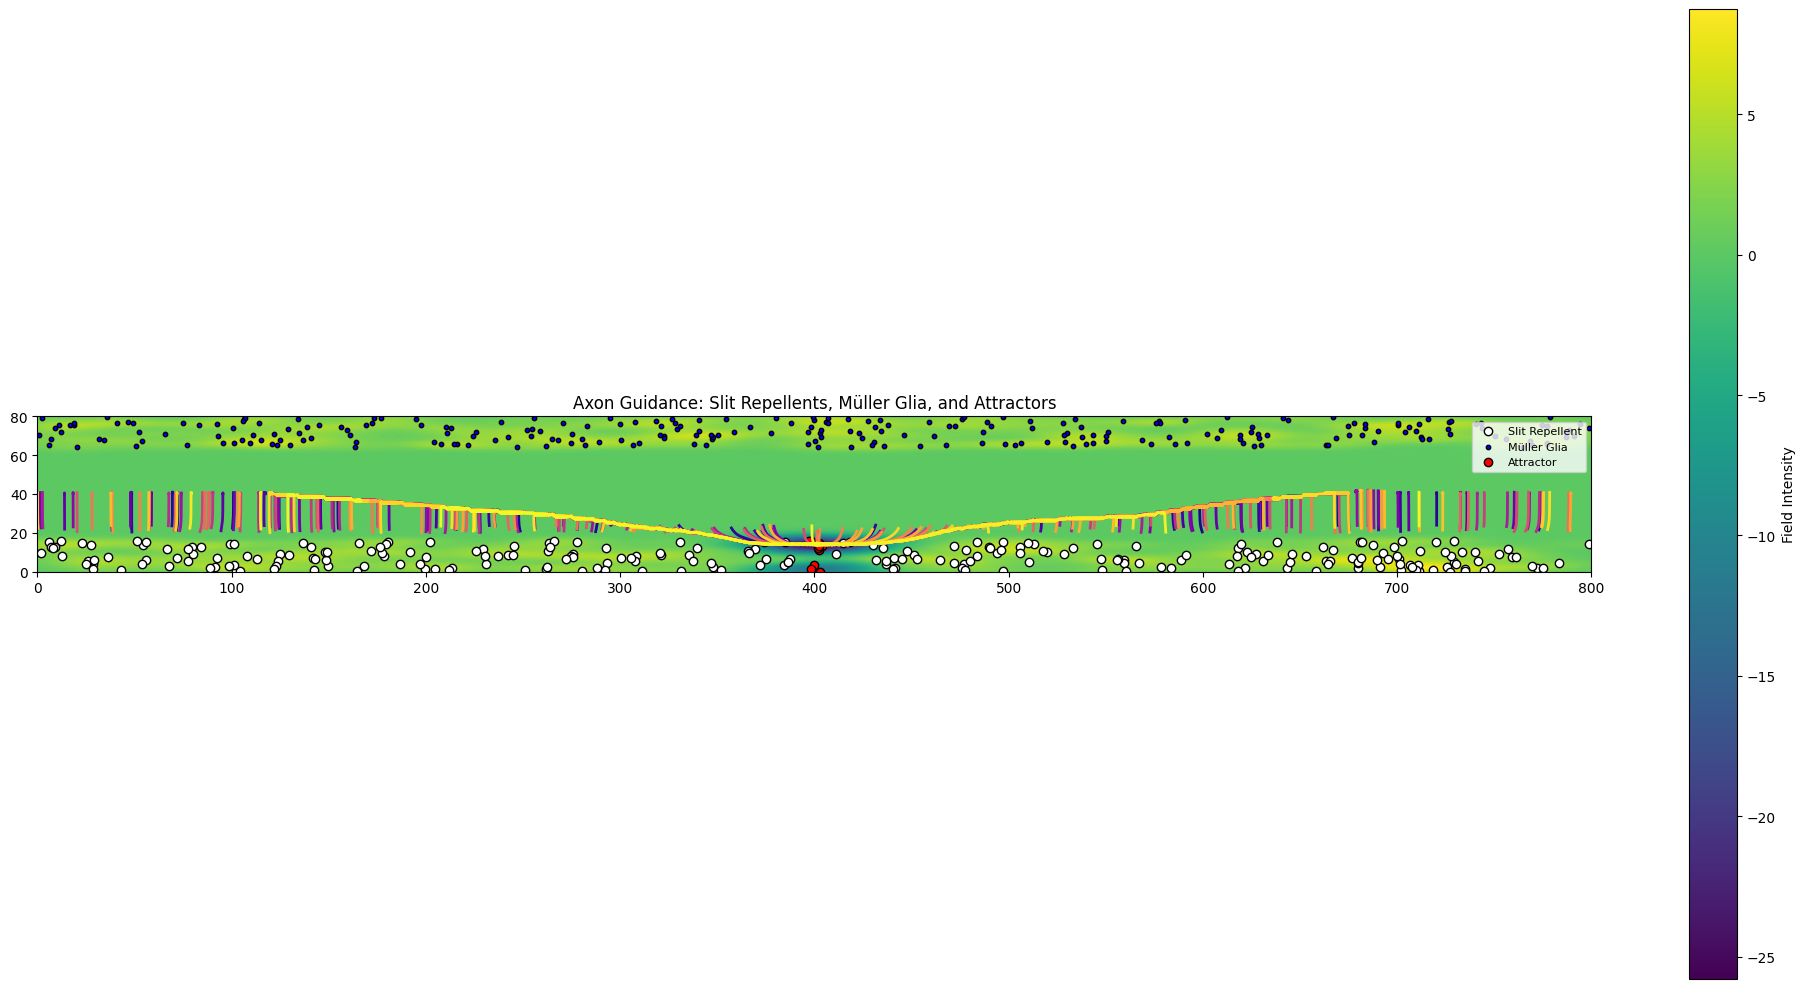

In [71]:
# widen field x 5 fold 
# sigmas reduced by 1 order of magnitude
wide_field = main(
        grid_width = 800,   
        grid_height = 80, 
        num_neurons = 250,
        num_amacrine_repellents = 250, # 50 x 5 - base x 5 to correct for widened field
        num_muller_repellents = 250,
        num_attractors = 10, 
        sigma_amacrine = 0.02,
        sigma_muller = 0.02,
        sigma_attractor = 0.03,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 500,     # 100 x 5

        # center is 0.5 original interval [-0.5,+0.5] so new interval is [-0.1,+0.1]
        am_left_end = 0.49,     # original - 0.45
        am_right_start = 0.51,  # original - 0.55
          
        # center is 0.5 original interval [-0.25,+0.25] so new interval is [-0.05,+0.05]
        atr_left = 0.495,       
        atr_right = 0.505       
    )

##### Problem 2 - conclusion

When sigmas are reduced the widened view behaves more similarly to the original field in the center region, however the normal field is breaking.

### 2. Are axons reaching target?

#### Define target: 

Current attractor coordinates: $y \in [0.0,0.2]$ $x\in [0.475, 0.525]$

Desired axon final position: $ y < 0.15 $ $x\in [0.45, 0.55]$ 

Axons need to be reaching downward into the optic disc so y is slightly less than in the attractor coordinates and there is a slight allowance along the x axis. 

#### Testing what % neurons reach target:

In [ ]:
def get_final_positions(all_trajectories):
    """
    Extract final positions of all simulated neurons.

    Iterates through each neuron's trajectory and collects the final (x, y)
    position in normalized coordinates.

    Parameters:
        all_trajectories (dict): Dictionary mapping neuron index to a list of (x, y) positions.

    Returns: 
        List of (index, (x, y)) tuples.
    """
    final_positions = []
    for idx, trajectory in all_trajectories.items():
        if len(trajectory) > 0:
            final_positions.append((idx, tuple(trajectory[-1])))
    return final_positions


def calculate_target_success(final_positions, y_thresh=0.15, x_range=(0.45, 0.55)):
    """
    Calculate the percentage of neurons reaching a specified target zone.

    The target zone is defined by y-coordinate below y_thresh and
    x-coordinate within the given x_range.

    Parameters:
        final_positions (List): List of (neuron index, (x, y)) final positions.
        y_thresh (float): Upper limit for y-coordinate in the target zone.
        x_range (Tuple[float, float]): Inclusive range (min, max) for x-coordinate.

    Returns:
        float: Percentage of neurons whose final positions lie within the target zone.
    """
    hits = 0
    for idx, (x, y) in final_positions:
        if y < y_thresh and x_range[0] <= x <= x_range[1]:
            hits += 1

    total = len(final_positions)
    success_percent = 100.0 * hits / total

    return success_percent


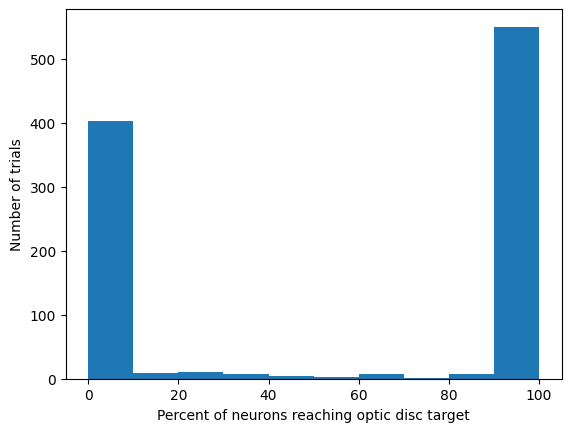

In [10]:
num_trials = 1000
target_success = []
all_trials_final_pos = [] #This is needed for the next test

for trial in range(num_trials):

    all_trajectories = main(
            grid_width = 160,   
            grid_height = 80,   
            num_neurons = 50,
            num_amacrine_repellents = 50,
            num_muller_repellents = 50,
            num_attractors = 10,
            sigma_amacrine = 0.2,
            sigma_muller = 0.2,
            sigma_attractor = 0.3,
            amacrine_strength = 1.0,
            muller_strength = 1.0,
            attractor_strength = 5.0,
            max_steps = 100,
            include_plot = False
        )
    final_positions = get_final_positions(all_trajectories)
    all_trials_final_pos.append(final_positions) #This is needed for the next test
    target_success.append(calculate_target_success(final_positions))

plt.hist(target_success)
plt.xlabel("Percent of neurons reaching optic disc target")
plt.ylabel("Number of trials")
plt.show()

#### __Problem 3:__ The model is not very precise. 


In [11]:
# Number of zero %
zero_percent_number = target_success.count(0)
# Number of 100 %
hundred_percent_number = target_success.count(100)

print(f"Number of 0% trials: {zero_percent_number}\nNumber of 100% trials: {hundred_percent_number} ")



Number of 0% trials: 397
Number of 100% trials: 273 


It seems a lot of our axons end up being confused, even in the original field. Lets plot the final positions to explore this further. 

##### Plotting final axonal positions for multiple tials

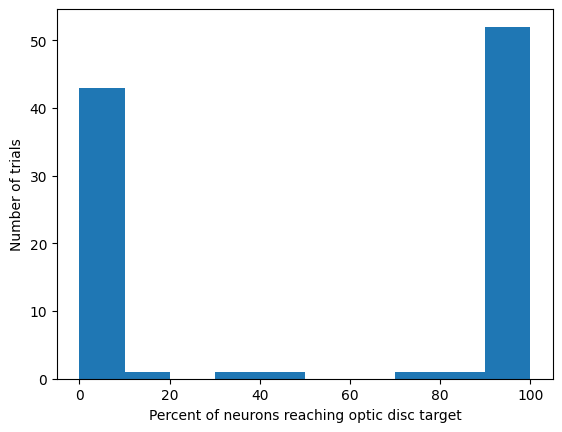

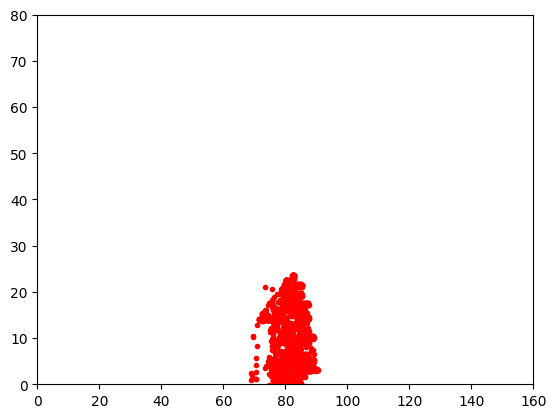

In [12]:
num_trials = 100
target_success = []
all_trials_final_pos = [] #This is needed for the next test

for trial in range(num_trials):

    all_trajectories = main(
            grid_width = 160,   
            grid_height = 80,   
            num_neurons = 50,
            num_amacrine_repellents = 50,
            num_muller_repellents = 50,
            num_attractors = 10,
            sigma_amacrine = 0.2,
            sigma_muller = 0.2,
            sigma_attractor = 0.3,
            amacrine_strength = 1.0,
            muller_strength = 1.0,
            attractor_strength = 5.0,
            max_steps = 100,
            include_plot = False
        )
    final_positions = get_final_positions(all_trajectories)
    # change what is being collected in all_trials_final_pos -> collect x,y tupples irrespective of trial id or neuron id
    list_of_coordinate_tuples_for_current_trial = [x[1] for x in final_positions]
    # 'extend' (used below) adds elements of a list to a new list flat (without nesting list in the list)
    # a = [1,2,3]; b = [4,5,6]; a.extend(b); a = [1,2,3,4,5,6]
    # note that extend returns None and modifies the first list !
    all_trials_final_pos.extend(list_of_coordinate_tuples_for_current_trial) #This is needed for the next test
    target_success.append(calculate_target_success(final_positions))

plt.hist(target_success)
plt.xlabel("Percent of neurons reaching optic disc target")
plt.ylabel("Number of trials")


fig, ax = plt.subplots()
atfp = np.array(all_trials_final_pos)
transposed = atfp.T
x, y = transposed
ax.plot(x*160, y*80, 'r.')
ax.set_xlim(0, 160)
ax.set_ylim(0, 80)

plt.show()



This graph is not very informative, as it seems all final positions are in a similar place, as they are all clustered around the center. 

Lets separate on and off target points.

In [13]:
# Plot all final possitions for all trials

## Separate on and off target final possitions

on_target = []
off_target = []

y_thresh=0.15, 
x_range=(0.45, 0.55)

for x, y in all_trials_final_pos:
    if y < y_thresh and x_range[0] <= x <= x_range[1]:
        on_target.append((x, y))
    else:
        off_target.append((x, y))

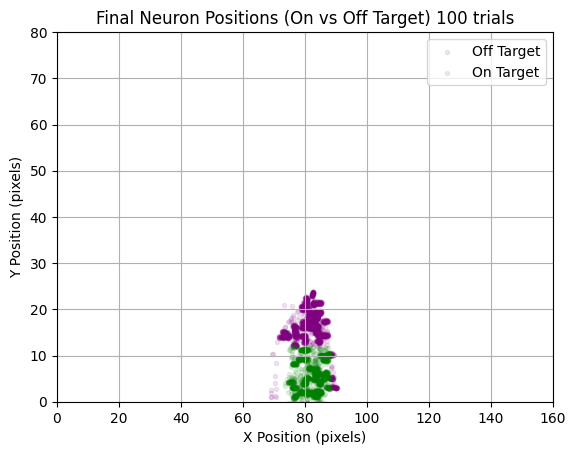

In [14]:
## Plot on vs off target

on_target = np.array(on_target)
off_target = np.array(off_target)

fig, ax = plt.subplots()
if len(off_target) > 0:
    ax.scatter(off_target[:, 0]*160, off_target[:, 1]*80, marker=".", color='purple', alpha=0.1, label='Off Target')
if len(on_target) > 0:
    ax.scatter(on_target[:, 0]*160, on_target[:, 1]*80, marker=".", color='green', alpha=0.1, label='On Target')

ax.set_xlim(0, 160)
ax.set_ylim(0, 80)
ax.set_title(f"Final Neuron Positions (On vs Off Target) {num_trials} trials")
ax.legend()
plt.xlabel("X Position (pixels)")
plt.ylabel("Y Position (pixels)")
plt.grid(True)
plt.show()


This gives us a more clear idea of the problem. Final positions show that cell positions are clustered in the midline, however, not all final positions are reaching down to the optic disc target zone.

### 3. Are axons __first growing upward__ and then towards the center? 

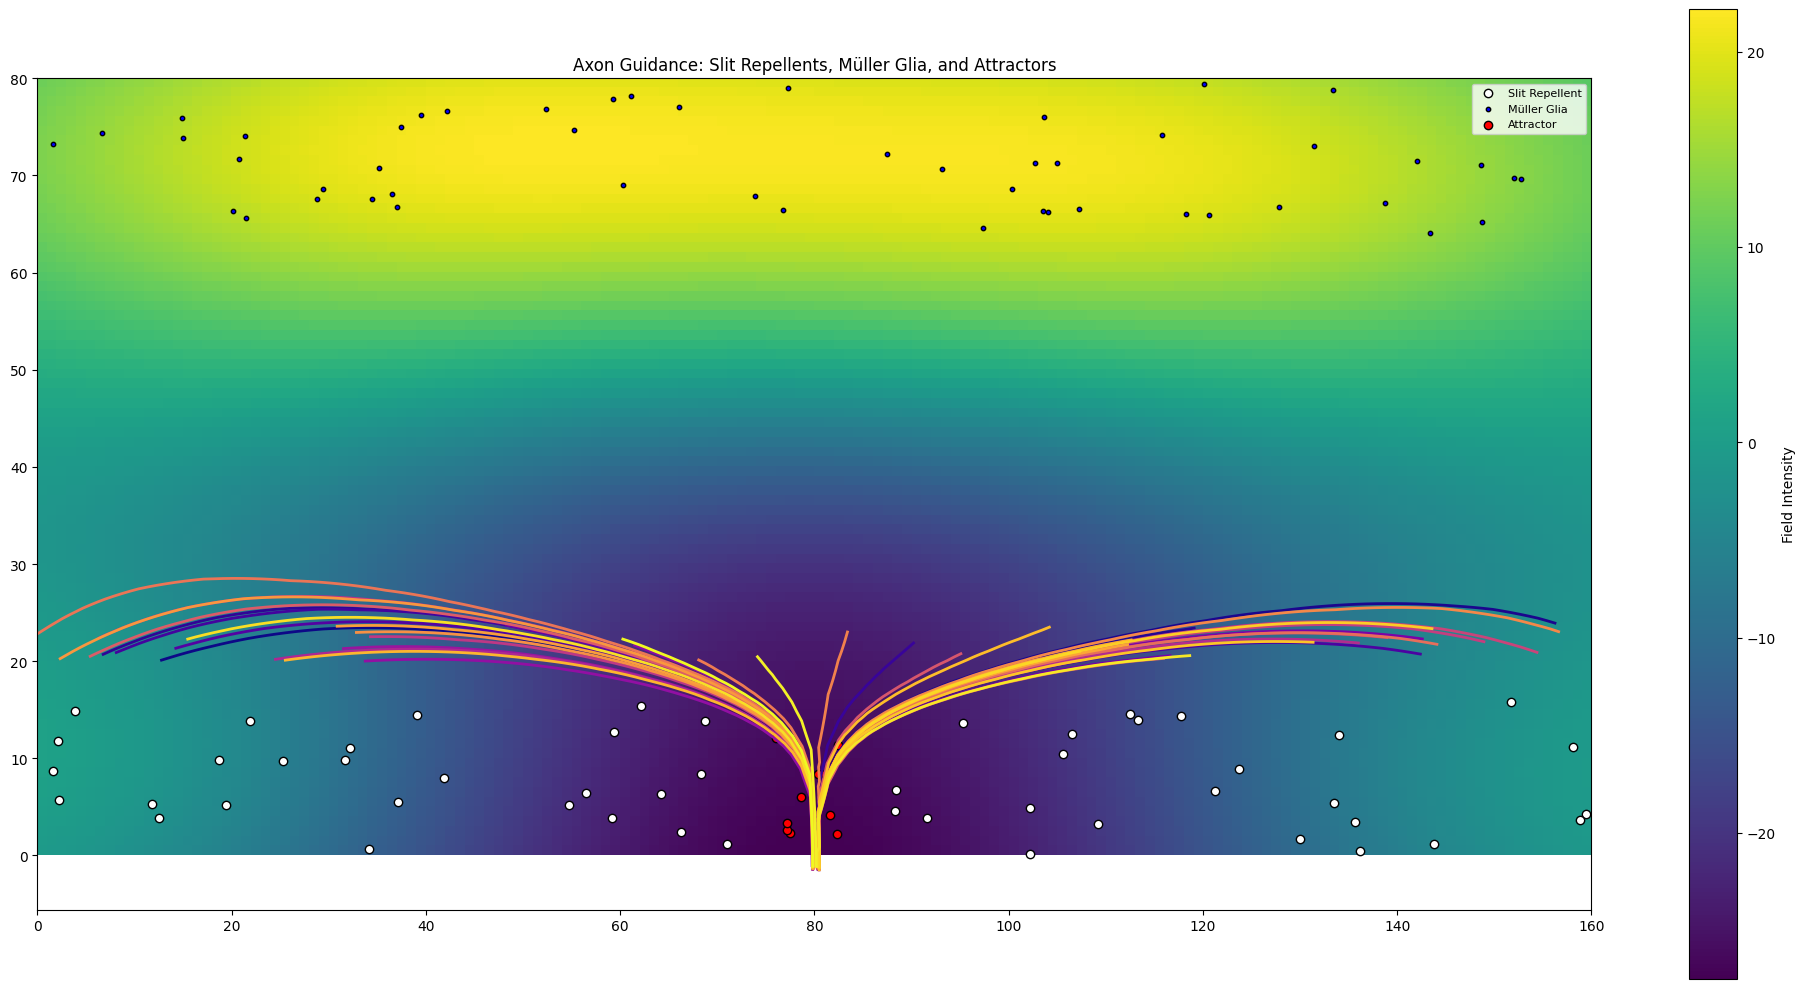

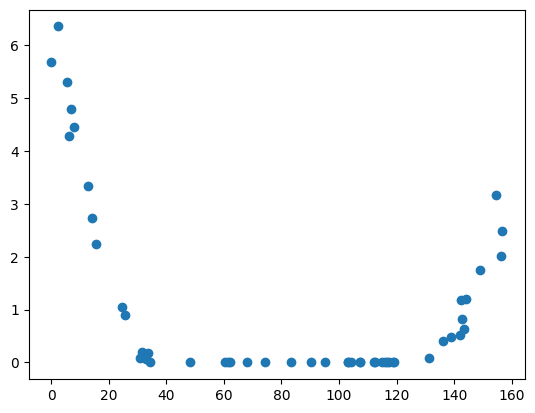

In [45]:
computed_trajectories = main(
        grid_width = 160,   # number of x-steps
        grid_height = 80,   # number of y-steps
        num_neurons = 50,
        num_amacrine_repellents = 50,
        num_muller_repellents = 50,
        num_attractors = 10,
        sigma_amacrine = 0.2,
        sigma_muller = 0.2,
        sigma_attractor = 0.3,
        amacrine_strength = 1.0,
        muller_strength = 1.0,
        attractor_strength = 5.0,
        max_steps = 100
    )

all_neurons_start_x = []
all_neurons_y_difference = []

for key in computed_trajectories:
    
    # max_y
    single_neuron_ys = computed_trajectories[key][:, 1] #extraxts y column
    max_y= single_neuron_ys.max()

    start_x = computed_trajectories[key][0,0]
    all_neurons_start_x.append(start_x)

    start_y = computed_trajectories[key][0,1]

    y_difference = max_y - start_y
    all_neurons_y_difference.append(y_difference)

all_neurons_start_x_scaled = [160*x for x in all_neurons_start_x]
all_neurons_y_difference_scaled = [80*x for x in all_neurons_y_difference]

plt.scatter(all_neurons_start_x_scaled, all_neurons_y_difference_scaled)
plt.show()





In [5]:
def run_multiple_trials_and_plot_upward_movement(
    num_trials,
    grid_width,
    grid_height,
    x_bin_size,
    **main_kwargs
):
    num_bins = grid_width // x_bin_size
    up_counts = np.zeros(num_bins)
    total_counts = np.zeros(num_bins)

    for _ in range(num_trials):
        trajectories = main(grid_width=grid_width, grid_height=grid_height, include_plot=False, **main_kwargs)

        for traj in trajectories.values():
            start_x, start_y = traj[0]
            max_y = np.max(traj[:, 1])

            bin_index = int(start_x * grid_width) // x_bin_size
            if bin_index >= num_bins:
                continue  # skip edge cases

            if max_y > start_y:
                up_counts[bin_index] += 1
            total_counts[bin_index] += 1

    with np.errstate(divide='ignore', invalid='ignore'):
        percent_upward = np.where(total_counts > 0, (up_counts / total_counts) * 100, np.nan)

    # Plot
    bin_edges = np.arange(0, grid_width, x_bin_size)
    bin_centers = bin_edges + x_bin_size / 2

    plt.figure(figsize=(12, 5))
    plt.bar(bin_centers, percent_upward, width=x_bin_size * 0.9, align='center', color='skyblue', edgecolor='black')
    plt.xlabel('Axon starting position')
    plt.ylabel('% of Trials Axon Moving Upward')
    plt.title(f'Upward Movement Across {num_trials} Trials (Bin Size: {x_bin_size})')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()


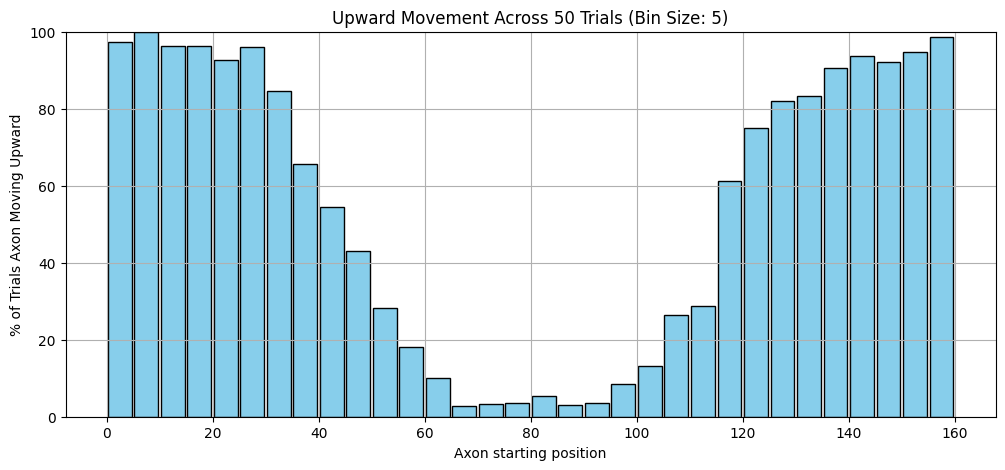

In [30]:
run_multiple_trials_and_plot_upward_movement(
    num_trials=50,
    grid_width=160,
    grid_height=80,
    x_bin_size=5,
    num_neurons=50,
    num_amacrine_repellents=50,
    num_muller_repellents=50,
    num_attractors=10,
    sigma_amacrine=0.2,
    sigma_muller=0.2,
    sigma_attractor=0.3,
    amacrine_strength=1.0,
    muller_strength=1.0,
    attractor_strength=5.0,
    max_steps=100
)


#### __Problem 4:__ Large amount of modelled axons are not moving up to form an optic tract before descending down to the optic disc.

This could be partially explained by a mistake in generating the axons position - in reality there would be no neurons growing directly above the optic disc (see fig. 2).

It is very important to check the possitioning in a widened field. Unfortunately the widened field currently is not working as expected and needs debugging. 

## Discussion

### 1. Is this a good way to model the optic pathway formation?

#### Issues with current model:

As you can see from the tests above there are multiple issues with this model: 

1. The role of the Müller repulsive field (top) for the final trajectories of axons is potentially not as significant as expected (Problem 1).

2. Widening the field to include parts of the retina further away from the optic disc, also breaks the model in the center region(Problem 2).

3. The model is not precise in reaching the target zone. In more than 40% of trials the success rate of axons reaching target is less than 50% (Problem 3). In the other trials final axonal possitions reach the midline, but do not go down to the optic disc target. 

4. We have only very central neurons in the original field (Problem 4) and the widened field is not behaving as expected (Problem 2) so it is difficult to evaluate whether the model could properly model axons growing up and forming optic tract. 

Many of the problems could potentially be solved by tweaking some of the parameters. It is important to include more realistic biological numbers in the model. The sizes of areas where the point-sources for the attractor and repellent fields are currently generated are just estimate of relative proportions based on some histological images. It is difficult to get precise measurements from papers as retina depths vary, the Müller area is difficult to observe under microscope, some cell layers are of known depth but contain other cells as well. Cells are modelled as dots, but in reality cell size might be a factor as well. 

#### Problem 3 - model precission in reaching target zone
One of the most significant problems with the current model is that in more than 40% of trials less than 50% of axons reach the optic disc target zone. The axons that fail to reach the target zone are still reaching central possitions, however they are not managing to move down into the optic disc region. 

This is __potentially be due to too large spread (sigma) of amacrine repellent point sources__ directly adjecent to the optic disc region. The large sigma means there is a big cummulative effect of the (many) amacrine cells around the optic disc region, which is populated by much fewer attractor cells. The attractor field is not strong enough to overcome this effect due the much fewer attractor cells. Attractor cells are intentionally a small number in order to represent biological accuracy, however their number is an approximation, so that could be modulated as well.

Another likely possibility that should be explored is rooted in anatomy. There might be a __physical barrier__ of connective tissue between the optic disc attractors and amacrine cells that would prevent the diffusion of repellent molecules from amacrine cells in the optic disc region. This could be modelled by introducing cut off zone in the repellent field at that place.  

### 2. Pros and Cons of (some) mathematical approaches.

#### 2.1 Gradient descent as mathematical model of axon movement.

As a potential extension of this project, it would be interesting to compare the __gradient descent algorithm__ of axonal movements to an __8-point greedy algorithm__ that only compares the 8 neighbours of each point and choses the lowest repulsion value from the final field. 

##### Smoother curves, more similar to real axons (+)

Using gradient descent to model trajectories should give a smooth curve as it is using a vector sum of the x and y partial derivatives, while an 8-point algorithm would produce more jagged trajectories that might not be as similar to real axon.

##### Using a gradient is step size sensitive

We have to be careful when chosing step size. 

__Small step size__ is going to follow the gradient more closely but is __more sensitive to noise__.

__Large step size__ is __less sensitive to noise__ but may __overshoot and miss local maximums__. 

Originally the step size was defined as: `step_size = 1.0 / max(grid_width, grid_height)` this is __NOT__ a good approach as it changes the step_size in widened field and can lead to different behaviour of the axons. More investigation needs to be done to determine the proper step size. This would also be potentially influenced by the sigma values for each point source of repellent and attractive fields in order to prevent overshooting. 

#### 2.2 Using normalised gradient to determine axon movement

Normalising the gradient by dividing by the vector length (See math explaination section) makes the model __sensitive only to gradient direction__ but not magnitude - this means that the axons are moving with the same 'speed' regardless of wether the signal is strong or weak. An interesting expansion of this project would be to compare normalised vs non-normalised gradient model and comparing it to real axons behaviour. 

### 3. Developing concept

#### 3.1 Adding noise

This field is very smooth, however in reality there would be different factors that create signal noise. An expansion of this project would be to add noise to the total field, however there is the questions of what type of noise is appropriate. We could use random or spatially correlated noise. Here is a comparison table of two potential noises:


|Gausian white noise                    |Perlin noise|
|---                                    |---            |
|Random                                 |Spatially correlated|
|Easy to implement                      |More complex              |
|Jerky - steep differences              |Smooth - might more accurately represent tissues|
|Random - less danger of bias           |Without biological data to support parameters it <br> might bias the model wrongly|
|Mimics highly localized, rapidly changing fluctuations like:<br> * receptor binding noise<br> * protein expression variability <br>     |Mimics smoother spatially correlated fluctuations like:<br>* tissue-level inhomogeneities<br>| 

It might be benefitial to include both.

#### 3.2 Overlap

The current model allows for axons to overlap and to move through simulated cell points. In reality, this wouldn't happen. However many axons grow side by side (in the 3rd dimention). Since our model is 2D this seems to be ok, but it might be benefitial to add some restrictions to this overlap, to be more accurate.

### 4. Code improvements:

#### Interesting code improvements:

##### Gradient calculations:

Currently the gradient is __calculated once__ for the whole field __BEFORE__ axons start moving. This is ok if we __ASSUME__ cues don't change significantly during the short time window of axon outgrowth. However, it would be better to find a way to __compute the gradient dynamically__. 

This would allow us to include an interesting attraction cue, which the axons themselves emit to promote tract formation. That should allow axons closer to the optic disc to cue the further away axons - especially important when widening the field.

#### Not so interesting code improvements:

1. Use classes. Seems like that would produce much clearer code with less need for variable repeats and writing them in each function. I didn't do it originally because I have no experience with that, and I didn't realise it could be done.

2. Use pandas dataframes - working with the data in tables format should be much easier. 

4. Put fields coordinates as a parameter in the main function to make testing much easier.

5. Generation of cell positions should be a separate function for easier testing with same positions.

6. Include fig numbers for code generated images for easier and more clear referencing in the discussion.

7. Make interactive plots to be able to vary different parameters or show neuronal movement over time.




## Conclusion

The model is successfully using vector fields and gradients to represent chemical cues and discrete time steps to simulate axon movement. Gradient descent is allowing for smooth realistic movement of neurons, however the resulting axon trajectories are not behaving as expected. 

In large amounts of tials majority of neurons are closer to the midline are not moving up from their starting possitions before growing centrally. In more than 40% of trials axons fail to descend into the otic disc target zone. 

Despite efforts to make the model scalable (able to accomodate widened view) the widened field is not behaving as expected even in the midline region where behaviour should be identical to the normal field size model.

This is potentially due to parameters problems. More work in precising them is needed. Special attention should be given to step size of axons and sigma values for attractors and repellents. Several problems need further investigation.

TLDR:

Gradient descent is a good way to model axon movement, BUT...

This model is not a complete work, nor completely working! :)

## References:

Erskine, L. and Herrera, E. (2014). Connecting the Retina to the Brain. ASN Neuro, 6(6), p.175909141456210.

Herrera, E., Erskine, L. and Morenilla-Palao, C. (2019). Guidance of retinal axons in mammals. Seminars in Cell and Developmental Biology, 85, pp.48-59.

Kwon, Y.H. et al. (2009) ‘Primary open-angle glaucoma’, New England Journal of Medicine, 360(11), pp. 1113–1124. doi:10.1056/nejmra0804630. 